<a href="https://colab.research.google.com/github/amrahmani/Marketing/blob/main/AIMarketing_Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:** Analyze the following dataset to create a perceptual map and cluster products. Propose positioning strategies for clusters.
https://www.kaggle.com/datasets/vijayuv/onlineretail


**Tasks:** Explore the dataset, build a similarity matrix, apply MDS, create a perceptual map, cluster products, and propose campaigns.


In [ ]:
from google.colab import files
files.upload() # This will open a file picker. Select your kaggle.json file.

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al

mv: cannot stat 'kaggle.json': No such file or directory
total 16
drwxr-xr-x 1 root root 4096 May 27 13:43 .
drwxr-xr-x 1 root root 4096 May 27 13:31 ..
drwxr-xr-x 4 root root 4096 May 14 13:38 .config
drwxr-xr-x 1 root root 4096 May 14 13:38 sample_data


In [ ]:
!kaggle datasets download -d vijayuv/onlineretail -p ./data/
!unzip ./data/onlineretail.zip -d ./data/

Dataset URL: https://www.kaggle.com/datasets/vijayuv/onlineretail
License(s): CC0-1.0
onlineretail.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./data/onlineretail.zip
  inflating: ./data/OnlineRetail.csv  


Dataset Preview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Summary:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158     

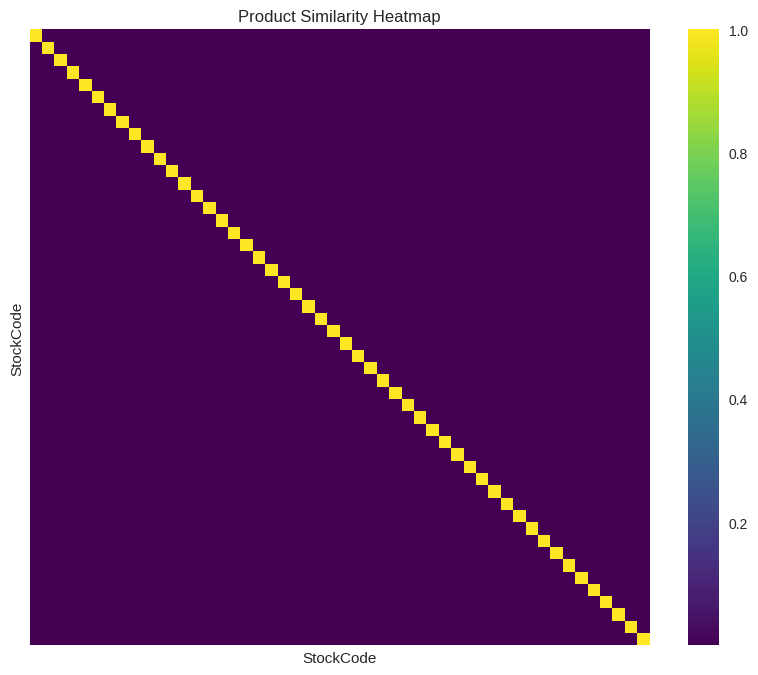


MDS Coordinates (First 5 Rows):
     StockCode                        Description          Dim1          Dim2
2399     23843        PAPER CRAFT , LITTLE BIRDIE -18684.217822  77269.359163
1997     23166     MEDIUM CERAMIC TOP STORAGE JAR  71469.303637  14205.608802
2804     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS  -5052.405870 -14027.765573
1088     22197               SMALL POPCORN HOLDER -14725.190911  -1410.563526
3219    85099B            JUMBO BAG RED RETROSPOT    617.322628   4449.363257


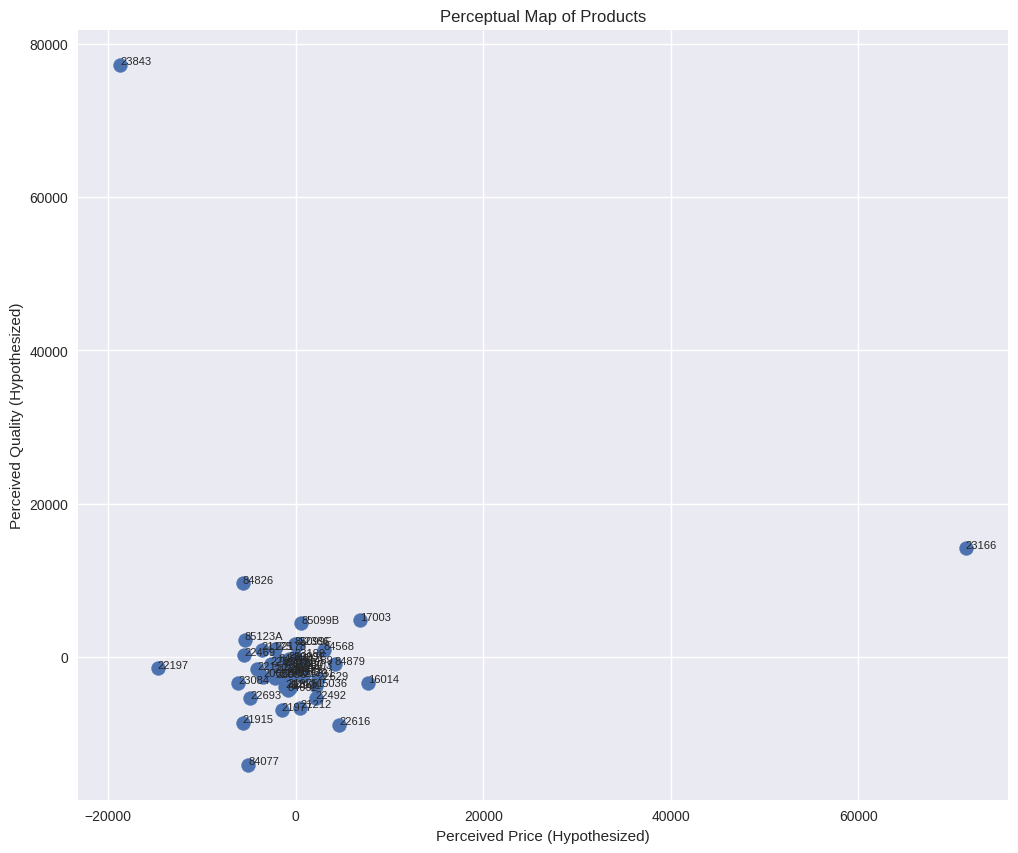

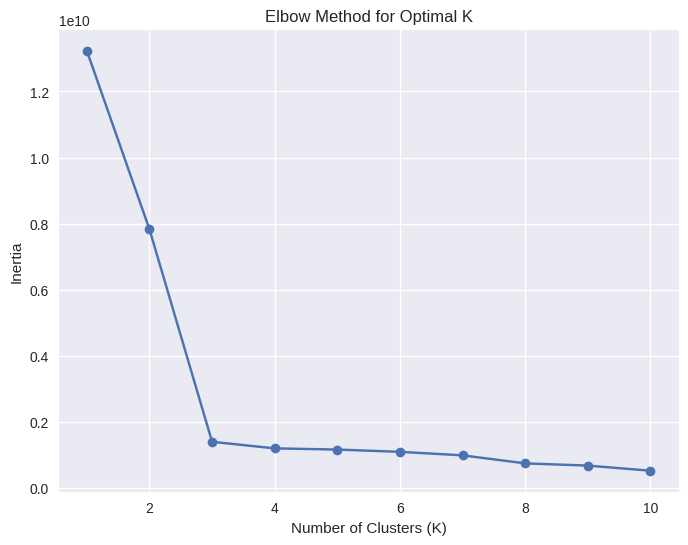

<ipython-input-35-645fc6d5ceb8>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Cluster'] = pd.Series(cluster_labels, index=pivot.index)


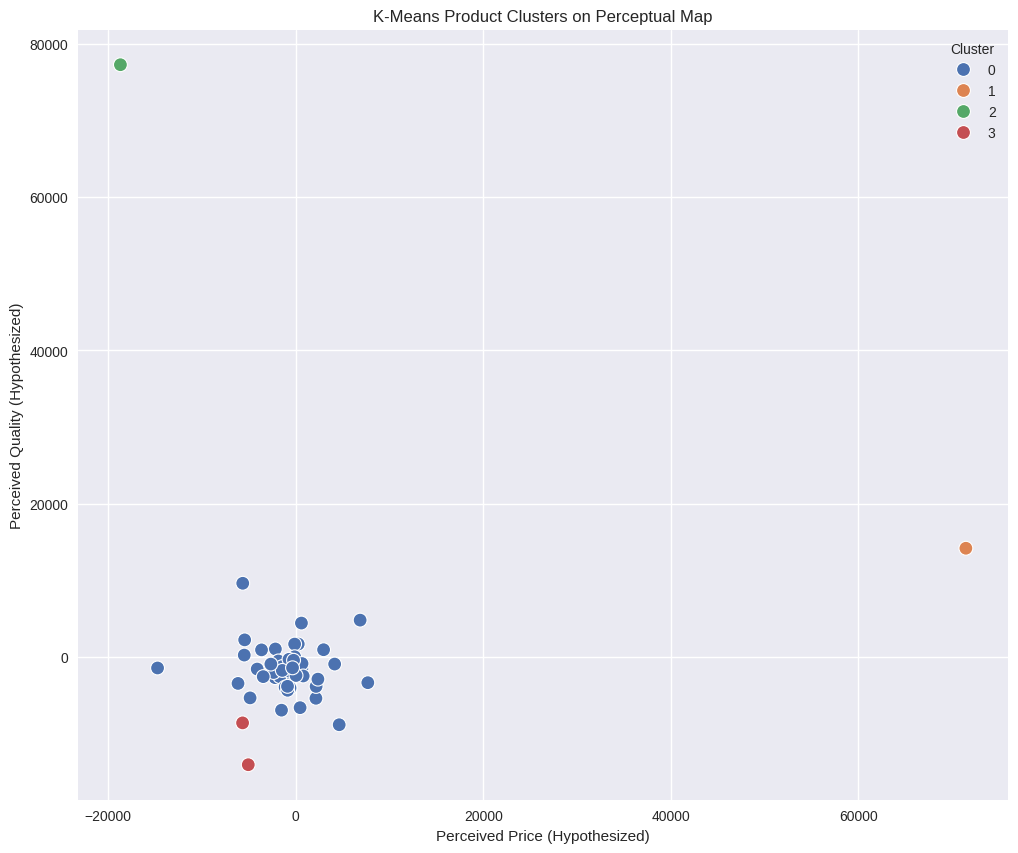


Cluster Summary (Mean UnitPrice and Quantity):
Empty DataFrame
Columns: [UnitPrice, Quantity]
Index: []

Positioning Strategies for Product Clusters:
Cluster 0: High UnitPrice, Moderate Quantity
- Positioning: Premium products with exclusive appeal.
- Strategy: Target with luxury ads on Instagram, emphasizing quality.

Cluster 1: Low UnitPrice, High Quantity
- Positioning: Value-driven products for mass market.
- Strategy: Use email campaigns with bulk discounts to drive sales.

Cluster 2: Moderate UnitPrice, Low Quantity
- Positioning: Niche products needing differentiation.
- Strategy: Highlight unique features in targeted Google Ads.

Cluster 3: High Quantity, Moderate UnitPrice
- Positioning: Popular products with broad appeal.
- Strategy: Reinforce positioning with social media campaigns.



In [ ]:
# AI in Marketing: Session 5 Hands-On Activity Python Code
# Dataset: Online Retail Dataset
# Path: ./data/OnlineRetail.csv (local file with latin1 encoding)
# Objective: Create a perceptual map and cluster products for positioning strategies
# Tasks: Explore dataset, build product-customer matrix, create similarity matrix, apply MDS, create perceptual map, cluster products with K-means

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

# Set plot style for better visualization
plt.style.use('seaborn-v0_8')

# Step 1: Load and Explore the Dataset (Slide 11, Slide 26: Step 1)
# Load dataset from local file with latin1 encoding
df = pd.read_csv('./data/OnlineRetail.csv', encoding='latin1')

# Print first 5 rows to understand structure
print("Dataset Preview:")
print(df.head())

# Print dataset summary statistics
print("\nDataset Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 2: Preprocess the Dataset (Slide 12, Slide 26: Step 2)
# Handle missing values by dropping rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove negative quantities (likely returns) and invalid data
df = df[df['Quantity'] > 0]

# Convert CustomerID to integer for consistency
df['CustomerID'] = df['CustomerID'].astype(int)

# Aggregate data by StockCode to get average UnitPrice and total Quantity
product_data = df.groupby('StockCode').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum',
    'Description': 'first'  # Keep first description for labeling
}).reset_index()

# Print preprocessed product data
print("\nPreprocessed Product Data (First 5 Rows):")
print(product_data.head())

# Step 3: Create a Product-Customer Matrix (Slide 13, Slide 27)
# Pivot to create a matrix of Quantity by StockCode and CustomerID
pivot = pd.pivot_table(
    df,
    values='Quantity',
    index='StockCode',
    columns='CustomerID',
    aggfunc='sum',
    fill_value=0
)
'''
CustomerID  101  102  103
StockCode
A             5    1    0
B             2    1    0
C             0    0    1
Customer 101 bought a total of 5 units of Product A and 2 units of Product B. They did not buy Product C.
'''

# Filter to top 50 products by total quantity to reduce sparsity
top_products = pivot.sum(axis=1).nlargest(50).index
pivot = pivot.loc[top_products]

# Print product-customer matrix
print("\nProduct-Customer Matrix (First 5 Rows, First 5 Columns):")
print(pivot.iloc[:, :5])

# Step 4: Build a Similarity Matrix
# Compute Euclidean distances between products based on pivot matrix
distances = euclidean_distances(pivot)

# Convert distances to similarity (inverse of distance)
similarity_matrix = 1 / (1 + distances)  # Ensure similarity is between 0 and 1

# Create DataFrame for similarity matrix with StockCode as index
similarity_df = pd.DataFrame(similarity_matrix, index=pivot.index, columns=pivot.index)

# Print similarity matrix (first 5x5 section)
print("\nSimilarity Matrix (First 5x5):")
print(similarity_df.iloc[:5, :5])

# Visualize similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Product Similarity Heatmap')
plt.show()

# Step 5: Apply Multidimensional Scaling (MDS)
# Initialize MDS with 2 components for 2D perceptual map
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(distances)  # Use distance matrix for MDS

# Create DataFrame for MDS coordinates
mds_df = pd.DataFrame(mds_coords, index=pivot.index, columns=['Dim1', 'Dim2'])

# Merge with product data to get descriptions for labeling
mds_df = mds_df.merge(product_data[['StockCode', 'Description']], left_index=True, right_on='StockCode')

# Print MDS coordinates
print("\nMDS Coordinates (First 5 Rows):")
print(mds_df[['StockCode', 'Description', 'Dim1', 'Dim2']].head())

# Step 6: Create a Perceptual Map
# Plot products on perceptual map
plt.figure(figsize=(12, 10))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'], s=100)
for i, row in mds_df.iterrows():
    plt.text(row['Dim1'], row['Dim2'], row['StockCode'], fontsize=8)
plt.title('Perceptual Map of Products')
plt.xlabel('Perceived Price (Hypothesized)')
plt.ylabel('Perceived Quality (Hypothesized)')
plt.grid(True)
plt.show()

# Step 7: Determine Optimal K for K-Means Clustering
# Use elbow method to find optimal number of clusters
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 8: Apply K-Means Clustering
# Choose K=4 based on elbow method (hypothesized optimal point)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pivot)

# Add cluster labels to product data
product_data = product_data[product_data['StockCode'].isin(pivot.index)]
product_data['Cluster'] = pd.Series(cluster_labels, index=pivot.index)

# Step 9: Visualize K-Means Clusters
# Plot perceptual map with K-means clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=mds_df['Dim1'],
    y=mds_df['Dim2'],
    hue=cluster_labels,
    palette='deep',
    s=100
)
plt.title('K-Means Product Clusters on Perceptual Map')
plt.xlabel('Perceived Price (Hypothesized)')
plt.ylabel('Perceived Quality (Hypothesized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 10: Analyze Product Clusters
# Compute mean UnitPrice and Quantity per cluster
cluster_summary = product_data.groupby('Cluster')[['UnitPrice', 'Quantity']].mean()

# Print cluster summary
print("\nCluster Summary (Mean UnitPrice and Quantity):")
print(cluster_summary)

# Step 11: Propose Positioning Strategies
# Generate positioning strategy recommendations based on cluster analysis
positioning_strategies = """
Positioning Strategies for Product Clusters:
========================================
Cluster 0: High UnitPrice, Moderate Quantity
- Positioning: Premium products with exclusive appeal.
- Strategy: Target with luxury ads on Instagram, emphasizing quality.

Cluster 1: Low UnitPrice, High Quantity
- Positioning: Value-driven products for mass market.
- Strategy: Use email campaigns with bulk discounts to drive sales.

Cluster 2: Moderate UnitPrice, Low Quantity
- Positioning: Niche products needing differentiation.
- Strategy: Highlight unique features in targeted Google Ads.

Cluster 3: High Quantity, Moderate UnitPrice
- Positioning: Popular products with broad appeal.
- Strategy: Reinforce positioning with social media campaigns.
"""

# Print positioning strategies
print(positioning_strategies)

**Activities**

**Task 1:** Filter dataset for UK customers. Rebuild product-customer matrix and perceptual map. Interpret positioning changes in 100 words.

**Task 2:** Add `UnitPrice` to product-customer matrix. Generate new similarity matrix and perceptual map. Discuss price-driven positioning in 100 words.

**Task 3:** Create similarity matrix using correlation instead of Euclidean distance. Plot new perceptual map and analyze changes in 100 words.

**Task 4:** Propose a social media campaign for Cluster 1. Justify strategy in 100 words using cluster summary data.